In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# image = cv2.imread('resources/qr-code-02.png')
image = cv2.imread('../resources/qr-code/qrcode100.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

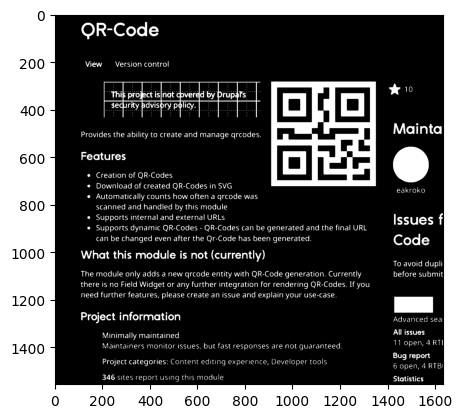

In [21]:
plt.imshow(thresh, cmap='gray')

In [22]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

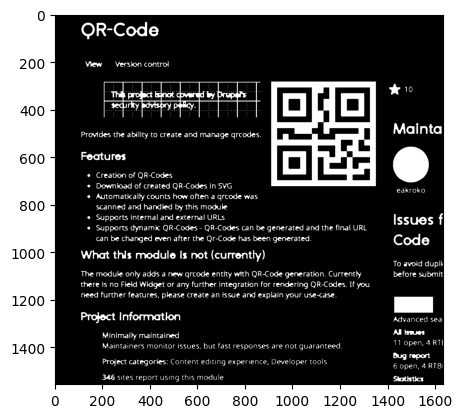

In [23]:
plt.imshow(closed, cmap='gray')

In [24]:
cropped = None
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
    if len(approx) == 4:
        area = cv2.contourArea(contour)
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)

        if area > 100 and 0.8 <= aspect_ratio <= 1.2:
            cv2.drawContours(image, [approx], -1, (0, 255, 0), 3)

            cropped = image[y:y + h, x:x + w]
            print('Found!!!!!')
    else:
        print('No contour found')


No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour found
No contour fou

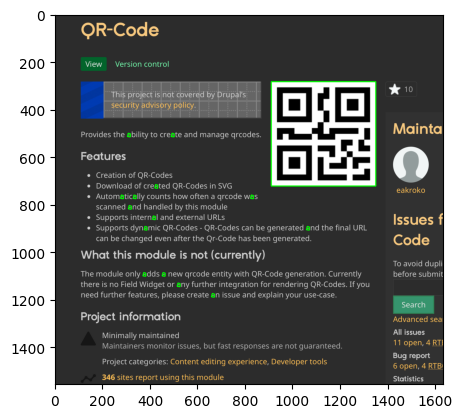

In [25]:
plt.imshow(image)

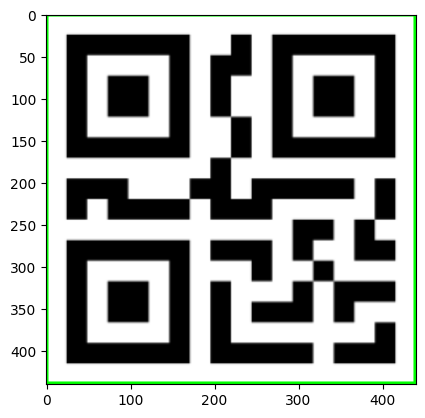

In [26]:
plt.imshow(cropped, cmap='gray')

In [27]:
import numpy as np
import cv2 as cv

img = cv.imread('../resources/qr-code/qrcode100.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv.moments(cnt)
print(M)

{'m00': 78.0, 'm10': 113544.83333333333, 'm01': 119834.5, 'm20': 165288013.8333333, 'm11': 174443447.5833333, 'm02': 184107021.8333333, 'm30': 240611596296.35, 'm21': 253938566510.83334, 'm12': 268005165309.03333, 'm03': 282852522749.25, 'mu20': 460.28596867375796, 'mu11': 7.454059810024072, 'mu02': 516.8301281782735, 'mu30': 28.520254313072357, 'mu21': 17.877755988639336, 'mu12': -25.187862345304662, 'mu03': -20.577847216052824, 'nu20': 0.07565515592928303, 'nu11': 0.00122519063281132, 'nu02': 0.0849490677479082, 'nu30': 0.0005307828561251673, 'nu21': 0.0003327181546347359, 'nu12': -0.00046876459685706614, 'nu03': -0.0003829688332490618}
